In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7) #(width,height)
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True

In [2]:
import glob
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 


def salva_imagem_com_predicao(imagem, img_filename, predicao):
  img = Image.fromarray(imagem[:,:,:])

  draw = ImageDraw.Draw(img)
  font = ImageFont.truetype("FreeMono.ttf", 11)
  fillcolor = "black"
  shadowcolor = "white"
  x, y = 1, 1

  text = "{:.3f}".format(predicao)

  # thin border
  draw.text((x-1, y), text, font=font, fill=shadowcolor)
  draw.text((x+1, y), text, font=font, fill=shadowcolor)
  draw.text((x, y-1), text, font=font, fill=shadowcolor)
  draw.text((x, y+1), text, font=font, fill=shadowcolor)

  # thicker border
  draw.text((x-1, y-1), text, font=font, fill=shadowcolor)
  draw.text((x+1, y-1), text, font=font, fill=shadowcolor)
  draw.text((x-1, y+1), text, font=font, fill=shadowcolor)
  draw.text((x+1, y+1), text, font=font, fill=shadowcolor)

  draw.text((x, y), text, font=font, fill=fillcolor)

  img.save(img_filename)

In [3]:
def logistic_regression(NUM_IT, alpha, m, X, Y, theta):
    J = np.zeros(NUM_IT)
    acc = np.zeros(NUM_IT)    
    for i in range(NUM_IT):
        z = np.dot(X,theta)
        H_theta = np.divide(1,1+np.exp(-z))
        E = H_theta - Y
        J[i] = (1/m)*np.sum(-Y*np.log(H_theta) - (1-Y)*(np.log(1-H_theta)))
        theta = theta - (alpha*(np.dot(X.T,E))) 
        acc[i] = np.sum((H_theta >= 0.5) == Y)/m
    return J, H_theta, acc

In [4]:
dir_cat = '../inputs/data/train/cat/*.png'
dir_noncat = '../inputs/data/train/noncat/*.png'

Temos que a regressão logística serve para classificar uma determinada classe, logo, para cada gato adicionado nos dados de treino, vamos adicionar um valor 1 aos dados de teste, pois isso significa que é um gato(true), e para cada não-gato adicionado aos dados de treino, vamos adicionar um 0 nos dados de teste, pois significa que não é um gato.

**Dúvidas**

* Na regressão logística, temos sempre que os dados de treino conterão uma classe que queremos classificar, comparando com outros elementos que não fazem parte dessa classe e nos dados de teste, teremos 1 para os elementos que pertencem a classe e 0 para os que não pertencem?

* Ou simplesmente, 1 para quem qremos predizer e 0 para testar o modelo

* X = X/255 (Fica entre 0 e 1)?

* A quantidade de $\theta's$ é relacionada a qtd de colunas do X certo? Se sim, as linhas são o que?

**Normalização**

https://stats.stackexchange.com/questions/189652/is-it-a-good-practice-to-always-scale-normalize-data-for-machine-learning

https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827

In [5]:
X = [] #dados de treino
Y = [] #dados de teste
for cat in glob.glob(dir_cat):
    img = np.asarray(Image.open(cat))
    img = np.reshape(img, -1)
    X.append(img)
    Y.append(1)
    
#-1 multiplica pelo grid(x1,x2,x3) da imagem, "desempacota" e multiplica - 64x64x3 = 12288
for noncat in glob.glob(dir_noncat):
    img = np.asarray(Image.open(noncat))
    img = np.reshape(img, -1)
    X.append(img)
    Y.append(0) 

In [6]:
X = np.asarray(X)
Y = np.asarray(Y)

Normalizando os dados

In [7]:
X = X/255

In [8]:
X.shape

(209, 12288)

In [9]:
X = np.insert(X, obj=0, values=1, axis=1)

In [10]:
Y = np.expand_dims(Y, axis=1)

In [11]:
X.shape

(209, 12289)

In [12]:
Y.shape

(209, 1)

In [13]:
theta = np.zeros((X.shape[1],1))

In [14]:
theta.shape

(12289, 1)

Se obter erros ou warnings, se atente a este e diminua o valor do alpha!

In [15]:
J, H_theta, acc = logistic_regression(1000, 0.0001, X.shape[0], X, Y, theta)

Text(0, 0.5, 'J($\\theta$)')

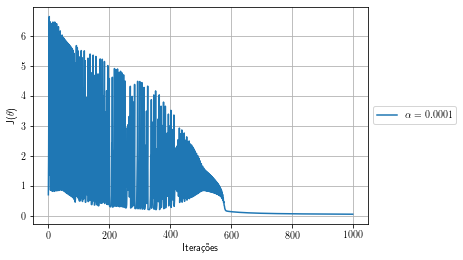

In [16]:
#Valores testados 0.0001(comportamento estranho), 0.00001, 
plt.plot(J, label=fr"$\alpha = {0.0001}$")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')

Text(0, 0.5, 'Acurácia')

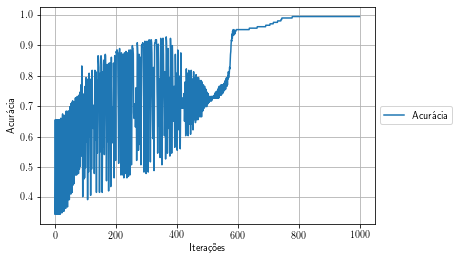

In [17]:
plt.plot(acc, label="Acurácia")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Iterações')
plt.ylabel('Acurácia')

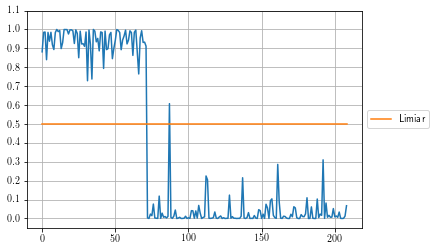

In [18]:
plt.plot(H_theta, label="")
plt.plot([0.5]*len(H_theta), label="Limiar")
plt.yticks(np.arange(-0,1.2,0.1))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.xlabel('Instâncias')
# plt.ylabel('Resultado')

In [19]:
X = X*255

In [20]:
X.shape

(209, 12289)

In [21]:
X = np.delete(X,obj=0,axis=1)

In [22]:
X.shape

(209, 12288)

Tenho 209 linhas, onde cada linha é uma figura (64x64x3)

In [23]:
len(X[0])

12288

Cada linha do H_Theta é a predição relacionada a uma imagem do dataset

In [24]:
H_theta[2,0]

0.9861314014816527

In [25]:
for i in range(0, len(X)):
    temp = np.uint8(np.reshape(X[i,:], (64,64,3)))
    salva_imagem_com_predicao(temp, f"../results/imagem_{i}.png", H_theta[i,0])